In [43]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [44]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [45]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [46]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [47]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data (excluding the 'coin_id' index)
scaled_data = scaler.fit_transform(df_market_data)

In [48]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
scaled_df = pd.DataFrame(scaled_data, columns=df_market_data.columns)

# Set the coinid column as index
scaled_df.index = df_market_data.index

# Display sample data
scaled_df.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [49]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [50]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    # Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    # 2. Fit the model to the data using `df_market_data_scaled`
    kmeans.fit(scaled_df)
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)
print(inertia_values)

[287.0, 198.5718180979813, 145.63574772192865, 79.02243535120975, 66.21778006000339, 59.13907002537009, 48.40631449041362, 38.99358798927969, 34.40059545400234, 28.573602560967846, 23.89004435537795]


In [51]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': list(range(1, 12)),  # The list of k values
    'inertia': inertia_values  # The corresponding inertia values
}

print(elbow_data)

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
elbow_df.head()

{'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'inertia': [287.0, 198.5718180979813, 145.63574772192865, 79.02243535120975, 66.21778006000339, 59.13907002537009, 48.40631449041362, 38.99358798927969, 34.40059545400234, 28.573602560967846, 23.89004435537795]}


,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780


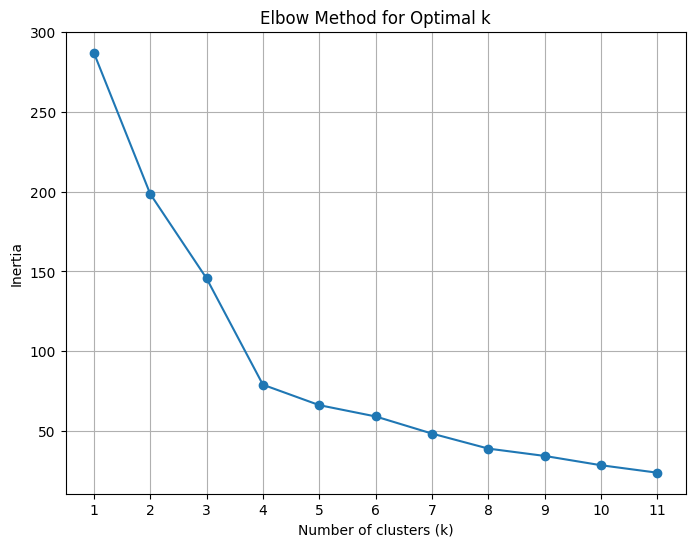

In [52]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.~
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])  # Ensures all k values are shown on the x-axis
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 
The best value for 'k' is 4.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [53]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=0)

# Display the model to verify
print(kmeans_model)

KMeans(n_clusters=4, random_state=0)


In [54]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(scaled_df)

# Optionally, display the inertia of the fitted model to verify
print(f"Model Inertia: {kmeans_model.inertia_}")

Model Inertia: 79.02243535120975


In [55]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_predictions = kmeans_model.predict(scaled_df)

# Print the resulting array of cluster values.
print(cluster_predictions)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [56]:
# Create a copy of the DataFrame
df_clustered = scaled_df.copy()

In [57]:
# Add a new column to the DataFrame with the predicted clusters
df_clustered['Cluster'] = cluster_predictions

# Display sample data
df_clustered.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2


In [58]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_clustered.hvplot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    c="Cluster",  # Color by the Cluster labels
    hover_cols=['coin_id'],  # Add cryptocurrency names in the hover
    title="Cryptocurrency Clustering by Price Change",
    width=800, 
    height=600
)

scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [59]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [60]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca_model.fit_transform(scaled_df)

# View the first five rows of the DataFrame. 
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [61]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_

print("Explained Variance Ratio for each Principal Component:")
print(f"PC1: {explained_variance[0]:.4f}")
print(f"PC2: {explained_variance[1]:.4f}")
print(f"PC3: {explained_variance[2]:.4f}")

total_explained_variance = explained_variance.sum()
print(f"\nTotal Explained Variance by the 3 components: {total_explained_variance:.4f}")

Explained Variance Ratio for each Principal Component:
PC1: 0.3720
PC2: 0.3470
PC3: 0.1760

Total Explained Variance by the 3 components: 0.8950


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total Explained Variance by the 3 components: 0.8950

In [62]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'], index=scaled_df.index)

# Display sample data
pca_df.head(10)

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the PCA Data

In [63]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [64]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    # Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    # 2. Fit the model to the data using `df_market_data_pca`
    kmeans.fit(pca_df)
    # 3. Append the model.inertia_ to the inertia list
    inertia_values_pca.append(kmeans.inertia_)

print(inertia_values_pca)

[256.8740855678924, 168.81189630685213, 115.9180766332006, 49.665496651797355, 41.35731380312855, 30.796641787041583, 25.91545691045612, 21.890936274633216, 17.720698854473657, 13.838698708864568, 7.984354811896223]


In [65]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': list(range(1, 12)),  # The list of k values from 1 to 11
    'inertia': inertia_values_pca  # The corresponding inertia values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

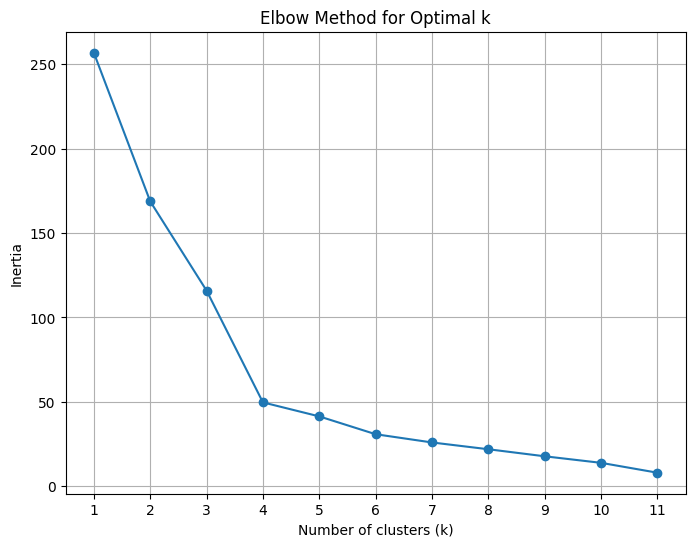

In [66]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])  # Ensure all k values are shown on the x-axis
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**
  The optimal number of clusters when using the PCA data is 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 
  Based on the previous analysis with the original data, the optimal k value was also identified as 4. Therefore, the best k value does not differ when using the PCA data compared to the original data. This consistency indicates that the dimensionality reduction via PCA still retains the primary clustering structure present in the original data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [67]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=4, random_state=0)

In [68]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_df)

print(f"Model Inertia: {kmeans_pca.inertia_}")

Model Inertia: 49.665496651797355


In [69]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_cluster_predictions = kmeans_pca.predict(pca_df)

# Print the resulting array of cluster values.
print(pca_cluster_predictions)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [70]:
# Create a copy of the DataFrame with the PCA data
pca_clustered_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_clustered_df['Cluster'] = pca_cluster_predictions

# Display sample data
pca_clustered_df.head(10)

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2
binancecoin,-0.516534,1.388377,0.804071,2
chainlink,-0.450711,0.517699,2.846143,2
cardano,-0.345600,0.729439,1.478013,2
litecoin,-0.649468,0.432165,0.600303,2


In [71]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = pca_clustered_df.hvplot.scatter(
    x="PC1", 
    y="PC2", 
    c="Cluster",  # Color by the Cluster labels
    hover_cols=['coin_id'],  # Add cryptocurrency names in the hover tool
    title="Cryptocurrency Clustering by PCA Components",
    width=800, 
    height=600
)

scatter_plot

:Scatter   [PC1]   (PC2,Cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [72]:
# Composite plot to contrast the Elbow curves

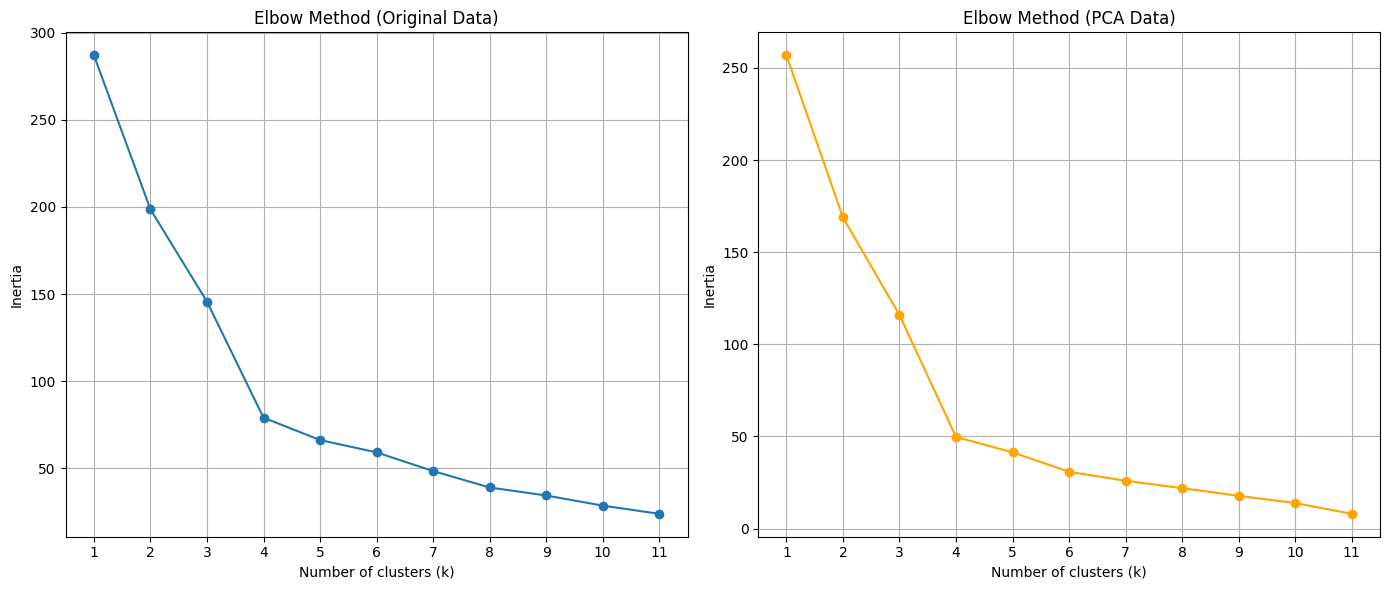

In [74]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
plt.figure(figsize=(14, 6))

# Subplot for the original data Elbow curve
plt.subplot(1, 2, 1)
plt.plot(list(range(1, 12)), inertia_values, marker='o', label='Original Data')
plt.title('Elbow Method (Original Data)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(list(range(1, 12)))
plt.grid(True)

# Subplot for the PCA data Elbow curve
plt.subplot(1, 2, 2)
plt.plot(list(range(1, 12)), inertia_values_pca, marker='o', color='orange', label='PCA Data')
plt.title('Elbow Method (PCA Data)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(list(range(1, 12)))
plt.grid(True)

plt.tight_layout()
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**  Using fewer features with PCA helps in simplifying the data and potentially enhances the clustering process by focusing on the most important aspects of the data. It makes the clustering more efficient while maintaining similar cluster quality as seen with the original data.